In [1]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets,transforms
import numpy as np
from torch.autograd import Variable

In [2]:
transformers=transforms.Compose([
                               transforms.Resize((32, 32)),
                        transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])

In [3]:
def dataloader(train_bsize, test_bsize):
    train_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=True,download=True,
                            transform=transformers),batch_size=train_bsize, shuffle=True)
    test_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=False,download=True,
                            transform= transformers),batch_size=test_bsize, shuffle=True)
    return (train_dataloader,test_dataloader)


In [4]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1,self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.linear1=nn.Linear(16*5*5,100)
        self.linear2=nn.Linear(100,80)
        self.linear3=nn.Linear(80,40)
        self.linear4=nn.Linear(40,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x=self.linear1(x)
        x=F.leaky_relu(x)
        x=self.linear2(x)
        x=F.leaky_relu(x)
        x=self.linear3(x)
        x=F.leaky_relu(x)
        x=self.linear4(x)
        return x
    

In [5]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2,self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.conv3=nn.Conv2d(16,32,2)
        self.linear1=nn.Linear(32*2*2,100)
        self.linear2=nn.Linear(100,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.view(x.size()[0], -1)
        x=self.linear1(x)
        x=F.leaky_relu(x)
        x=self.linear2(x)
        return x

In [6]:
def train_model(model,optimizer,train_dataloader,max_epochs):
    epoch_list=[]
    loss_list=[]
    accuracy_list=[]
    for epoch in range(max_epochs):
        total_loss=0
        total_samples=0
        correct_samples=0
        epoch_list.append(epoch)
        model.train()
        counter=0
        for b_index,(data,t) in enumerate(train_dataloader):
            #forward propagation
            counter+=1
            optimizer.zero_grad()
            output=model(data)
            loss=Floss(output,t)
            loss.backward()
            optimizer.step()
            total_loss=total_loss+loss.data
            #For accuracy
            batch_samples=t.size(0)
            total_samples+=batch_samples
            predicted=np.argmax(output.data,axis=1)
            correct_samples += (predicted == t).sum().item()
        accuracy=(correct_samples/total_samples)*100
        loss_list.append(total_loss/counter)
        accuracy_list.append(accuracy)
        print("Epoch: ",epoch+1,"Accuracy: ",round(accuracy,2),'Total Loss per batch: ',total_loss/counter)
    return epoch_list,loss_list,accuracy_list        
            
            

In [7]:
train_dataloader, test_dataloader= dataloader(100,1000)
model1=CNN1()
learning_rate=0.01
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)
Floss=nn.CrossEntropyLoss()
max_epochs=20

epoch_list_m1,loss_list_m1,accuracy_list_m1=train_model(model1,optimizer,train_dataloader,max_epochs)




Epoch:  1 Accuracy:  94.27 Total Loss per batch:  tensor(0.1889)
Epoch:  2 Accuracy:  97.69 Total Loss per batch:  tensor(0.0894)
Epoch:  3 Accuracy:  98.03 Total Loss per batch:  tensor(0.0808)
Epoch:  4 Accuracy:  98.13 Total Loss per batch:  tensor(0.0821)
Epoch:  5 Accuracy:  98.02 Total Loss per batch:  tensor(0.0896)
Epoch:  6 Accuracy:  98.4 Total Loss per batch:  tensor(0.0724)
Epoch:  7 Accuracy:  98.91 Total Loss per batch:  tensor(0.0418)
Epoch:  8 Accuracy:  99.13 Total Loss per batch:  tensor(0.0339)
Epoch:  9 Accuracy:  99.17 Total Loss per batch:  tensor(0.0302)
Epoch:  10 Accuracy:  99.05 Total Loss per batch:  tensor(0.0352)
Epoch:  11 Accuracy:  99.19 Total Loss per batch:  tensor(0.0310)
Epoch:  12 Accuracy:  98.41 Total Loss per batch:  tensor(0.0696)
Epoch:  13 Accuracy:  98.67 Total Loss per batch:  tensor(0.0611)
Epoch:  14 Accuracy:  99.01 Total Loss per batch:  tensor(0.0420)
Epoch:  15 Accuracy:  99.38 Total Loss per batch:  tensor(0.0237)
Epoch:  16 Accuracy:

In [8]:
model2=CNN2()
learning_rate=0.01
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)
Floss=nn.CrossEntropyLoss()
max_epochs=20
epoch_list_m2,loss_list_m2,accuracy_list_m2=train_model(model2,optimizer,train_dataloader,max_epochs)

Epoch:  1 Accuracy:  94.31 Total Loss per batch:  tensor(0.1770)
Epoch:  2 Accuracy:  97.46 Total Loss per batch:  tensor(0.0829)
Epoch:  3 Accuracy:  97.84 Total Loss per batch:  tensor(0.0728)
Epoch:  4 Accuracy:  97.82 Total Loss per batch:  tensor(0.0743)
Epoch:  5 Accuracy:  97.88 Total Loss per batch:  tensor(0.0759)
Epoch:  6 Accuracy:  97.89 Total Loss per batch:  tensor(0.0767)
Epoch:  7 Accuracy:  97.92 Total Loss per batch:  tensor(0.0775)
Epoch:  8 Accuracy:  98.15 Total Loss per batch:  tensor(0.0676)
Epoch:  9 Accuracy:  98.0 Total Loss per batch:  tensor(0.0714)
Epoch:  10 Accuracy:  98.03 Total Loss per batch:  tensor(0.0728)
Epoch:  11 Accuracy:  98.0 Total Loss per batch:  tensor(0.0718)
Epoch:  12 Accuracy:  98.14 Total Loss per batch:  tensor(0.0691)
Epoch:  13 Accuracy:  98.32 Total Loss per batch:  tensor(0.0608)
Epoch:  14 Accuracy:  98.43 Total Loss per batch:  tensor(0.0565)
Epoch:  15 Accuracy:  98.23 Total Loss per batch:  tensor(0.0622)
Epoch:  16 Accuracy: 

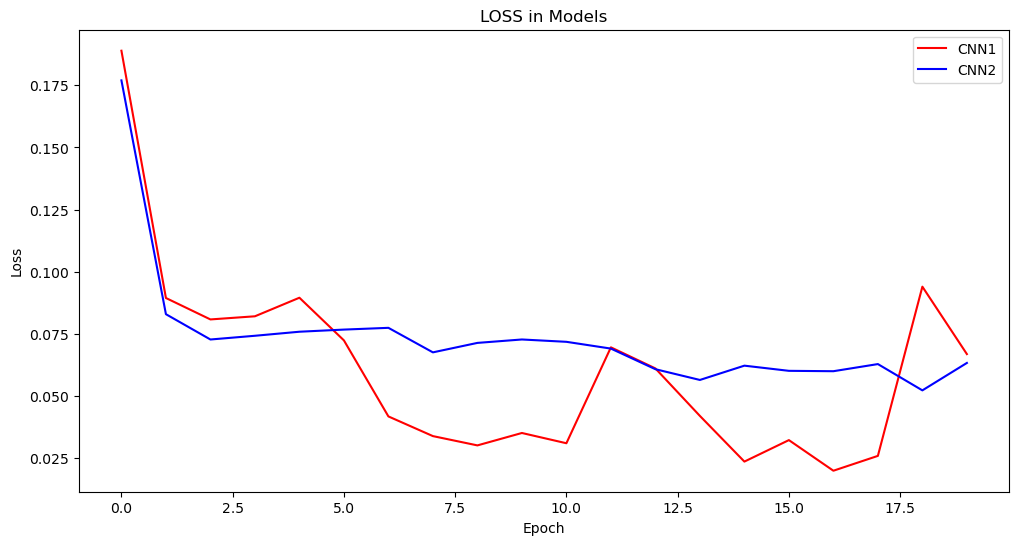

In [13]:
plt.figure(figsize=(12,6))
plt.plot(epoch_list_m1,loss_list_m1,color='r')
plt.plot(epoch_list_m2,loss_list_m2,color='b')
plt.title("LOSS in Models")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['CNN1', 'CNN2'])
plt.show()

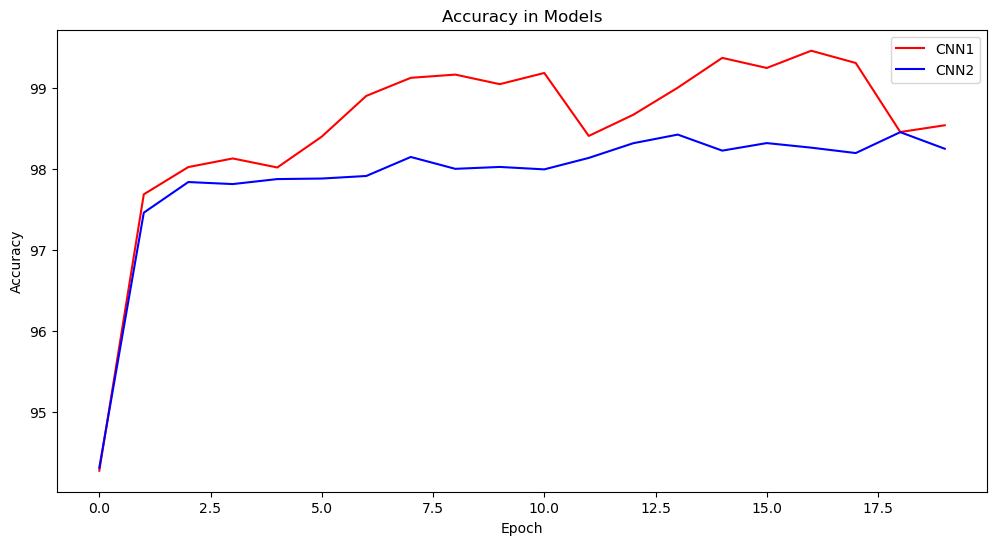

In [14]:
plt.figure(figsize=(12,6))
plt.plot(epoch_list_m1,accuracy_list_m1,color='r')
plt.plot(epoch_list_m2,accuracy_list_m2,color='b')
plt.title("Accuracy in Models")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['CNN1', 'CNN2'])
plt.show()